# **Exoplanet Properties | Astronomical Data Science**

**Group Name:** AstroContis >.<

**Author:** Jann Rovic Cueto
- Joana Agustin
- Don Punzalan
- Maica Turingan

**School:** Rizal Technological University


First, select the system you intend to do by marking an "x"

__ GJ 1252

__ GJ 143 with 2 planets

__ GJ 3090

__ HD 1397

__ HD 110082 - two stars and 1 planet

__ HD 183579

__ HD 20329 = X

# **EXOPLANET PARAMETERS**

**Instruction:** Compute for the required astrophysical parameters of the chosen exoplanet system using some of the basic equations.

# **Part I.a.** Data Selection and Acquisition

In [ ]:
# Installing the  necessary packages
!pip install lightkurve
!pip install mpld3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 64.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 65.7 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=acdfa24c1ffac90b91803f629339eafee99588a668ae04b36d8945c5bbfb2f5c
  Stored in directory: /root/.cache/pip/wheels/3c/ea/60/8d1c9fbbc99492a1775b36a5e29c8c1ef309cc5821bd5a219d
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50452 sha256=1b96f6be69ede4a3977e0a9f0801cad722836901d6c44d1609df1cf46c26d8d7
  Stored in directory: /root/.cache/pip/wheels/3e/b8/c5/b55

In [ ]:
# Import packages and make it abbrevriate for easy coding.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lightkurve as lk
import astropy as ast
import mpld3

from __future__ import division
import io
from google.colab import files
from mpld3 import plugins
import warnings
warnings.filterwarnings('ignore')

# **Chosen Study HD 20329**

**List of Markers**

- 'o' (circle, the default)
- 's' (square)
- 'D' (diamond)
- '^' (upward-pointing triangle)
- 'v' (downward-pointing triangle)
- 'x' (x marker)
- '*' (star)
- 'p' (pentagon)
- 'h' (hexagon)
- '+' (plus sign)
- '.' (point marker)
- ',' (pixel marker)

The alpha value, it controls the transparency of the markers. You can set it to a value between 0 (completely transparent) and 1 (completely opaque). Ex. alpha = 0.5

**List of Colors**

- 'b' - blue
- 'g' - green
- 'r' - red
- 'c' - cyan
- 'm' - magenta
- 'y' - yellow
- 'k' - black
- 'w' - white

In [ ]:
t1 = 'HD 20329' # Input the target star in the variable t1.

In [ ]:
# Search for the available data using lk.search_lighcurve (syntax)
don = lk.search_lightcurve(t1)
don

SearchResult containing 8 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 42 2021      SPOC     120   333657795      0.0
  1 TESS Sector 43 2021      SPOC     120   333657795      0.0
  2 TESS Sector 42 2021 TESS-SPOC     600   333657795      0.0
  3 TESS Sector 43 2021 TESS-SPOC     600   333657795      0.0
  4 TESS Sector 44 2021 TESS-SPOC     600   333657795      0.0
  5 TESS Sector 42 2021       QLP     600   333657795      0.0
  6 TESS Sector 43 2021       QLP     600   333657795      0.0
  7 TESS Sector 44 2021       QLP     600   333657795      0.0

# **Plot the Target Pixel File**

In [ ]:
# Check the temporal changes of the star flux
lk.search_targetpixelfile(t1, author='TESS-SPOC', sector= [42,43,44])

SearchResult containing 3 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 42 2021 TESS-SPOC     600   333657795      0.0
  1 TESS Sector 43 2021 TESS-SPOC     600   333657795      0.0
  2 TESS Sector 44 2021 TESS-SPOC     600   333657795      0.0

In [ ]:
vic1 = lk.search_targetpixelfile(t1)[2].download() # 0 is the # or number of the data

In [ ]:
vic1.animate() # animate the temporal frames of the star, takes few seconds

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

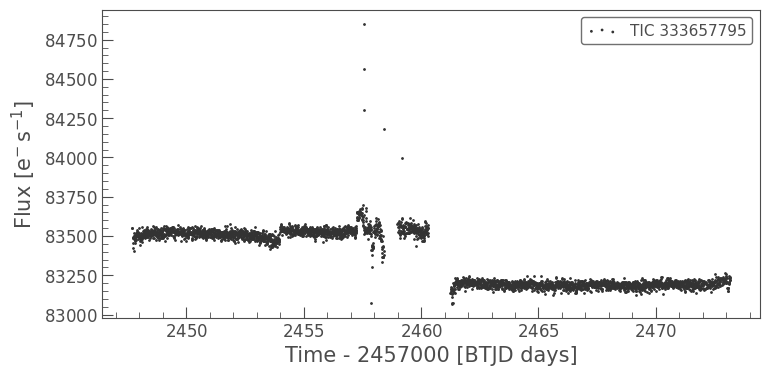

In [ ]:
# transforming the Target Pixel File to lightcurve plot.
vic2 = vic1.to_lightcurve()
#don1.plot()
vic2.scatter()

It may looks straight indicating nothing but lets explore it more in zoom in to test if the data chosen have a good data.

# **Light Curve Checking**

In [ ]:
lc = lk.search_lightcurve(t1)[2].download()
lc.info() # after experementing its seems that .info can only plot 1 sector or # at a time.

<TessLightCurve length=3446>
      name       dtype      unit      format      class      n_bad
--------------- ------- ------------ -------- -------------- -----
           time  object                                 Time     0
           flux float32 electron / s {:14.7e} MaskedQuantity   639
       flux_err float32 electron / s {:14.7e} MaskedQuantity   639
       timecorr float32            d {:14.7e}       Quantity     0
      cadenceno   int32                {:10d}         Column     0
   centroid_col float64          pix {:10.5f} MaskedQuantity    56
   centroid_row float64          pix {:10.5f} MaskedQuantity    56
       sap_flux float32 electron / s {:14.7e} MaskedQuantity    56
   sap_flux_err float32 electron / s {:14.7e} MaskedQuantity    56
        sap_bkg float32 electron / s {:14.7e} MaskedQuantity    56
    sap_bkg_err float32 electron / s {:14.7e} MaskedQuantity    56
    pdcsap_flux float32 electron / s {:14.7e} MaskedQuantity   639
pdcsap_flux_err float32 electron 

Will just gonna use the same data used in the target pixel file.

Text(0.5, 1.0, 'HD 20329')

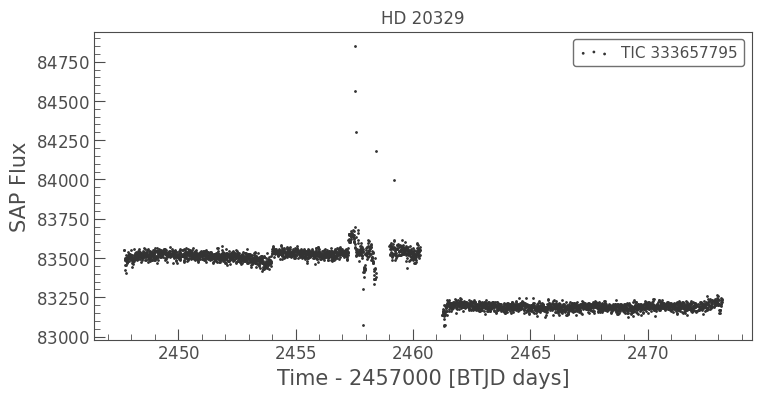

In [ ]:
# lc.plot(column='sap_flux', ylabel='SAP_Flux').set_title('HD 20329') # plotting it by line plot
lc.scatter(column='sap_flux', ylabel='SAP Flux').set_title('HD 20329') # plotting by scatter plot

- It look that the catalog name of the star is TIC 333657795.
- Usually in exoplanet detection astronomers use the sap_flux column.

# **Part I.b.** Data Visualization

**a. Light Curve of the system**

In [ ]:
# Upon checking on the above available data its seems that we can call 3 TESS-SPOC data.Let's see.
sector_data = lk.search_lightcurve(t1, author = 'TESS-SPOC', sector = [42,43,44])
sector_data

SearchResult containing 3 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 42 2021 TESS-SPOC     600   333657795      0.0
  1 TESS Sector 43 2021 TESS-SPOC     600   333657795      0.0
  2 TESS Sector 44 2021 TESS-SPOC     600   333657795      0.0

If we follow the reference of sir which is downloading all the data some times this results can noticed below.

- We can notice on the results most of the dataframes are ignored due to quality mask but it still plot the few data.

- Ignoring Cadences: The warning informs us that, based on the quality mask criteria (quality_bitmask=175), 32% of the cadences (408 out of 1288) do not meet the quality standards and are therefore being ignored or excluded from further analysis. This might be due to various factors, such as cosmic ray hits, spacecraft issues, or other sources of noise in the data.

- In our case we filter the data that we will used to ensured that will get the smooth results. This is very important to minimize the error on getting the properties of the exoplanet and most of the time for accurate detection of the Exoplanet.

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

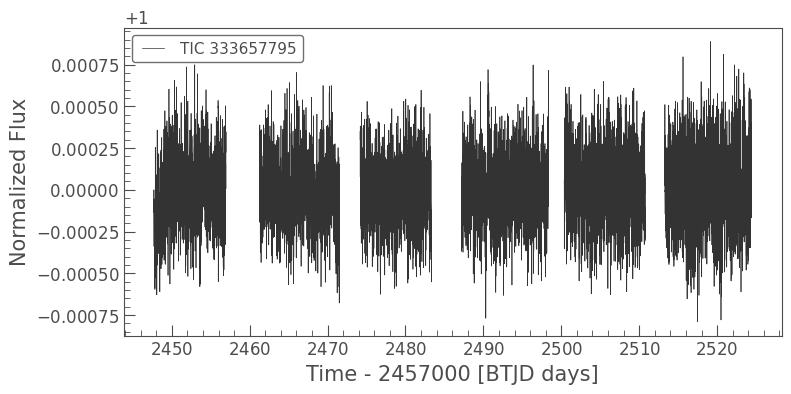

In [ ]:
# It looks that the data are confirmed available with same exposure time. We use this list of data. Let's download it and plot it.
data_collect = sector_data.download_all().stitch()
data_collect.plot()

At the first glance it looks that the 3 sector data give a good data. Let's go deep inside of it.

**b. Periodogram**

(0.0, 14.0)

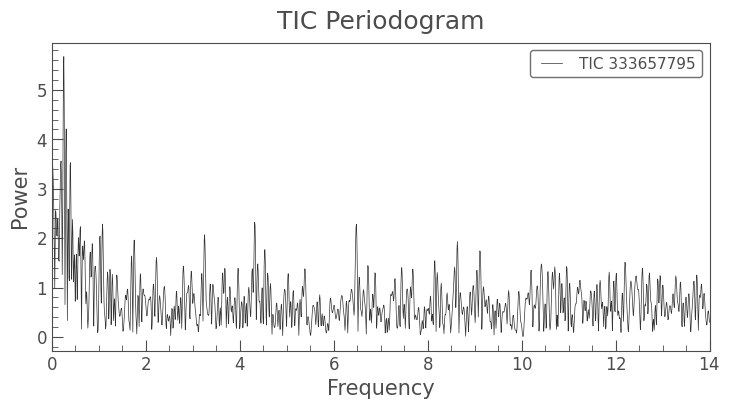

In [ ]:
# Here we will plot the data wee collected and input in variable lc.
# Rememberin getting the periodogram, transit duration, phase binning and Bin Fit curve we use the single sector data. But in Bin Fit curve we remove the outliers from the target pixel file and then fold it
# with the periodogram. Here we use the same data sector for target pixel file and for our sap_flux light kurve that was inside of variable lc.
lc.to_periodogram().plot(title= 'TIC Periodogram',
                         ylabel= 'Power', xlabel='Frequency').set_xlim(0,14) # sa xlim nagset lng tyo gaan kahaba yung line tick sa x label.(0, 14)

**Box Least Square Method**

- Sir Kalaw said...
- Period and Transit Duration are already embedded in the lightcurve
- bls - box least squares, we will use bls instead of lomb scargle (ls)
- ls decomposed the signals into linear combination, while bls fits
- time series to periodic box

In [ ]:
# period
joana = lc.to_periodogram(method='bls').period_at_max_power
joana

<Quantity 0.34119954 d>

In [ ]:
#transit duration
maica_dur = lc.to_periodogram(method='bls').duration_at_max_power
maica_dur

<Quantity 0.33 d>

- The BLS method is specifically designed to detect and characterize transits of exoplanets in light curves. When we call lc.to_periodogram(method='bls'), we are performing a periodogram analysis using the BLS algorithm, and the duration_at_max_power method in this context gives us the duration of the transit event.

- Based on these measurements, it's clear that the exoplanet is consistently passing in front of its host star every 0.33 days. Additionally, it returns to the same position in its orbit approximately every 0.34119954 days.

In [ ]:
# epoch
ep = lc.to_periodogram(method='bls').transit_time_at_max_power
ep

<Time object: scale='tdb' format='btjd' value=2447.9187358142967>

- Time object is the type of data structure that stores time information.
- scale='tdb' indicates that the time scale used is Barycentric Dynamical Time (TDB), which is a precise time scale used in astronomy.
- format='btjd' specifies the format of the time value, which stands for Barycentric Julian Date (BJD), a common format for representing time in astronomy.
- value=2447.9187358142967> is the actual transit time in BJD, meaning that the exoplanet is predicted to transit its host star at this specific time.

**The reason we can't use the Lomb Scargle Method**

In [ ]:
ls = lc.to_periodogram(method='ls').period_at_max_power
ls

<Quantity 3.97027102 d>

The Lomb-Scargle periodogram is primarily used to identify periodic variations in time-series data, such as the brightness of a star. It's a tool for detecting the presence of periodic signals but does not provide information about the specific characteristics of those signals, such as transit duration.

In [ ]:
duration = lc.to_periodogram(method='ls').frequency_at_max_power
duration

<Quantity 0.25187197 1 / d>

The frequency_at_max_power in the context of a Lomb-Scargle periodogram does not directly represent the transit of a planet in its host star. Instead, it represents the frequency (or angular frequency) associated with the maximum power in the periodogram. This frequency is related to the periodic signal that the Lomb-Scargle periodogram is analyzing, and it can be used to infer characteristics of the underlying periodic phenomenon.

**c. Phase Folding**

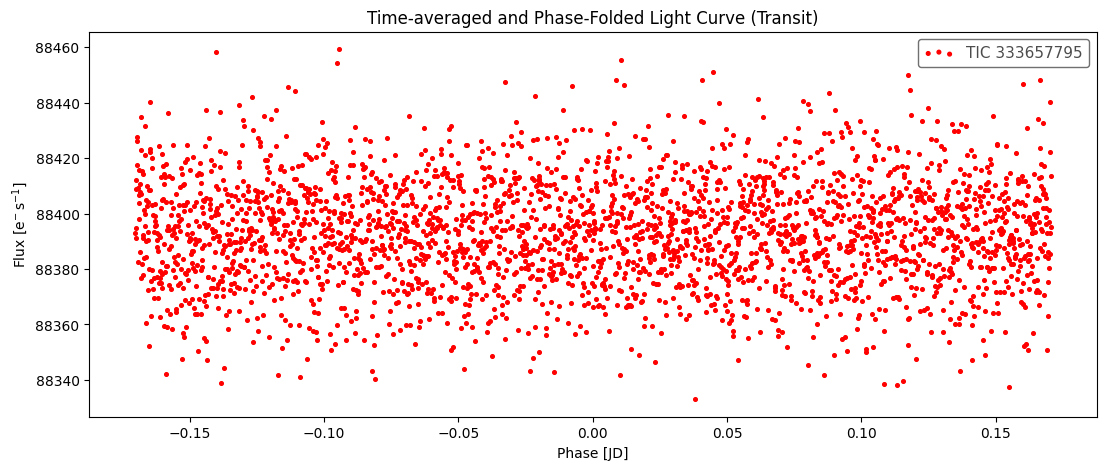

In [ ]:
# Plotting the Transit of the Planet
# We adopt our own figure size so we are free to change its presentation more good.
# here gagawin ntin yung phasefold ng lc variable ntin if you remember sa lc variable ntin yung sap_flux column yung iniexamine ntin.
# Our period is in vairable named joana whil our epoch_time is in vaiable ep.

fig, ax = plt.subplots(figsize=(13, 5))
lc.fold(period=joana, epoch_time=ep).scatter(s=7, linewidth=1, marker='o', color='r', ax=ax)
ax.set_title('Time-averaged and Phase-Folded Light Curve (Transit)')
plt.show()

# lc.fold(period=joana, epoch_time=ep).scatter().set_title('Time-averaged and Phase-Folded Light Curve (Transit)') # using scatter
# lc.fold(period=joana, epoch_time=ep).plot().set_title('Time-averaged and Phase-Folded Light Curve (Transit)') # using line

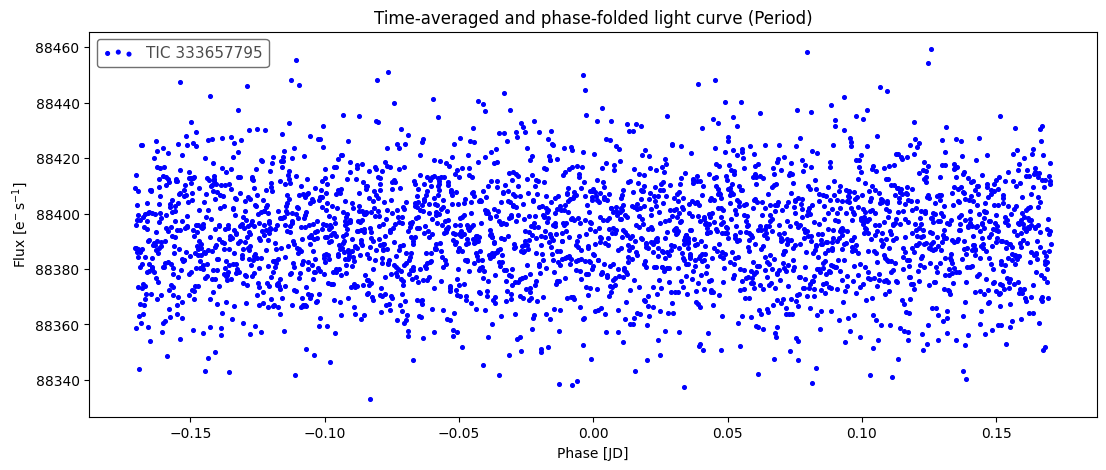

In [ ]:
# Plotting the Period of the planet.
# In our case 'lc' is our light curve and 'joana' is the period value variable.
# We adopt our own figure size so we are free to change its presentation more good.
fig, ax = plt.subplots(figsize=(13, 5))

lc.fold(joana).scatter(s=7, linewidth=1, marker='o', color='b', ax=ax)
ax.set_title("Time-averaged and phase-folded light curve (Period)")

plt.show()

#plt.figure(figsize=(20, 4))
#lc.fold(joana).scatter(linewidth = 0,
                   # marker = 's', color = 'b',
                   # alpha = 1).set_title("Time-averaged and phase-folded light curve (Period)")

Text(0.5, 1.0, 'Time-averaged and phase-folded light curve (Period)')

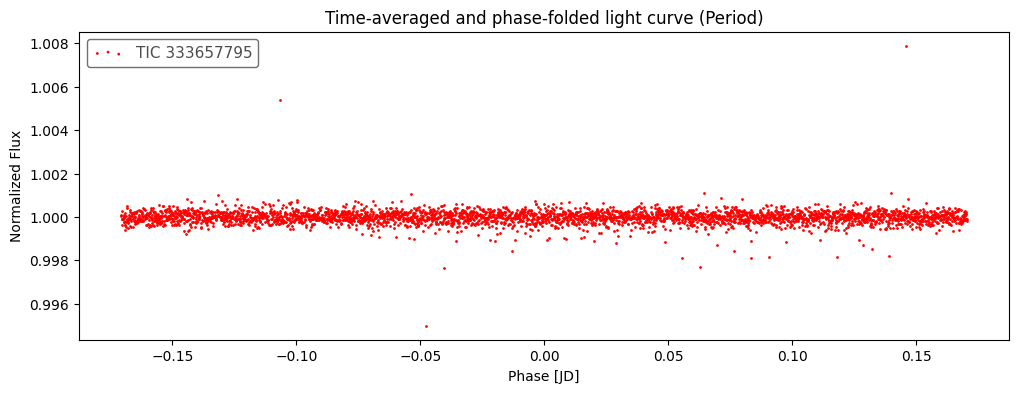

In [ ]:
# Alternatively, we can use the target pixel file
fig, ax = plt.subplots(figsize=(12, 4))

target_lc = vic1.to_lightcurve().remove_outliers().flatten()
target_lc.fold(joana).scatter(linewidth = 0,
                        marker = 'o', color = 'r', ax=ax).set_title("Time-averaged and phase-folded light curve (Period)")
# note that we used the same period value
# also, using tpf will give us phase folded lc in normalized unit

Meaning in this plot we are plotting the fits images from variable vic1 which is in the targetpixelfile and remove the outliers then plot the period of variable joana.

**d. Binned Fit Curve**

- define the size of the bin first, usually we start with 30 minutes
- But bin units must be in days so you must be convert them
- !! CHANGE the value as necessary

- we can try to change the 30 mins like 15, 50 to 55
- 60min is just conversion from 1 hour and 24 mean here in earth we have earth 24 hour rotation

In [ ]:
bin_time = 15/60/24 #15 mins / 60 min/ 24 days

In [ ]:
# We are going to use the collection of data we defined in Multiple data plotting which inside the data_collect variable.
data_collect_binned = data_collect.bin(bin_time) #this will take some time

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

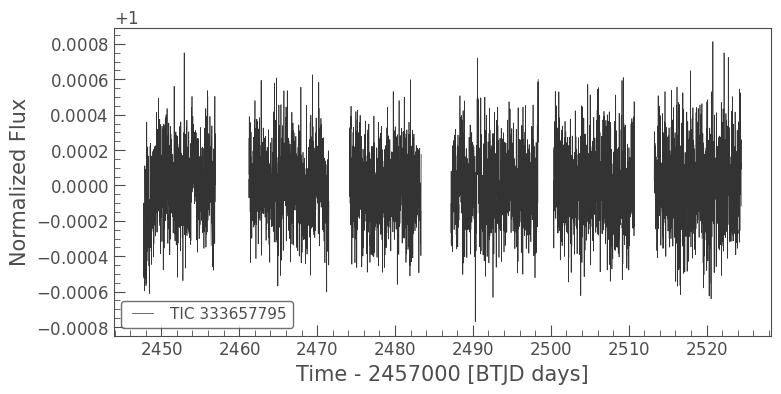

In [ ]:
data_collect_binned.plot()
#mpld3.display() # Use this code to zoom in & out the end of x - axis and y - axis

Text(0.5, 1.0, 'Binned Phase')

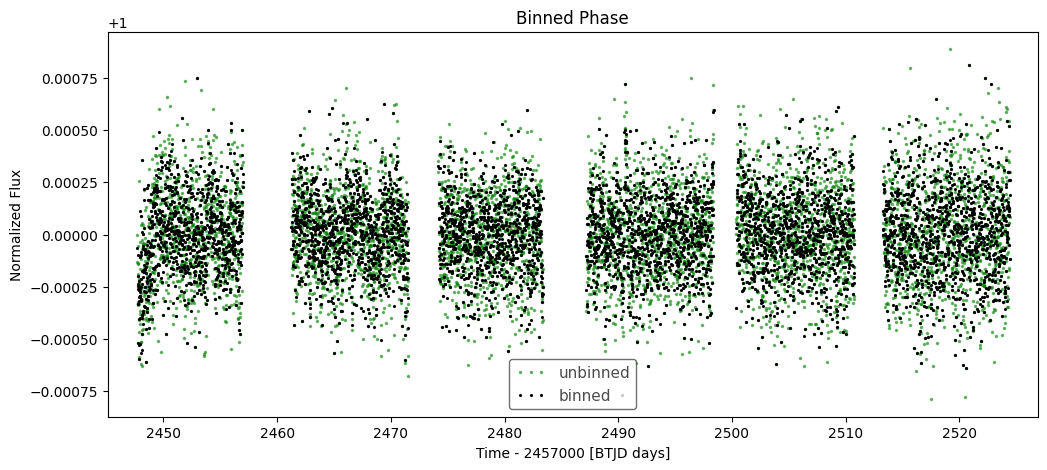

In [ ]:
# plotting the binned and unbinned data on the same axes
fig, ax = plt.subplots(figsize = (12,5))

# now plot both the binned and unbinned data (specify what to plot, in this case: ax =ax)
data_collect.plot(ax = ax, linewidth = 0, marker = 'o', color = 'g', alpha =0.5, markersize = 1.5, label='unbinned')
data_collect_binned.plot(ax = ax, linewidth = 0, marker = '.', color = 'k', markersize = 2.5, label='binned')

# insert the hashtag below to zoom out on the binned lc collect
# we use the xlim with allowance for good visualisation.
plt.xlim(2445.1, 2526.9) # exact value xleft = 2447.7, xright =  2524.5

plt.title('Binned Phase')

#mpld3.display() #use this to interact witht the plot

Text(0.5, 1.0, 'Binned Phase')

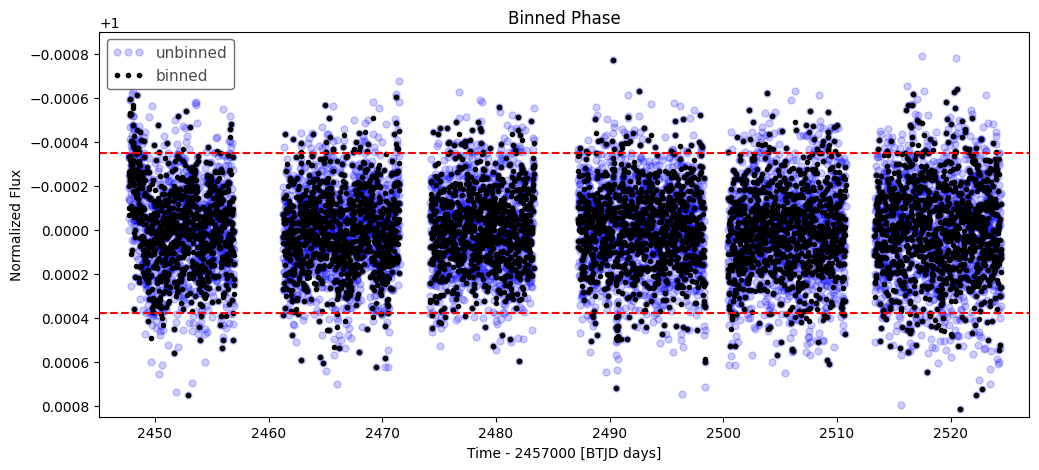

In [ ]:
# plotting the binned and unbinned data on the same axes
fig, ax = plt.subplots(figsize = (12,5))

# now plot both the binned and unbinned data (specify what to plot, in this case: ax =ax)
data_collect.plot(ax = ax, linewidth = 0, marker = 'o', color = 'b', alpha =0.2, markersize = 5, label='unbinned')
data_collect_binned.plot(ax = ax, linewidth = 0, marker = 'o', color = 'k', markersize = 3, label='binned')

plt.axhline(y=1.00038, color='r', alpha=1, linestyle='--')
plt.axhline(y=0.99965, color='r', alpha=1, linestyle='--')

# insert the hashtag below to zoom out on the binned lc collect
plt.xlim(2445.1, 2526.9)
plt.ylim(1.00085,0.9991)

plt.title('Binned Phase')


# **Part I.c.** Results and Interpretation

# **Physical Parameters**

**a. Orbital Period (Earth-years and in Relation to Solar Period)**

# **Distance in Parsec**

- $d = \frac{1}{\text{P}}$

wherein, P is parallax in arcseconds.

# **Absolute Magnitude**

- $M = m-5log\frac{d}{\text{10pc}}$

wherein, m is the apparent magnitude; d is the distance in parsec.

# **Density of the parent star(derived by Lo & Fu, 2022)**

- $p^* = \frac{3P}{G\pi^2T^3}$

wherein, p is the orbital period

# **Fractional depth**

- $σ = \frac{R_p^2}{R_*^2}$

wherin, Rp is the estimated radius of the exoplanet in earth or Jupiter scale;
R* is the estimated radius of the star in solar scale

# **Star's Mass**

$m^* = \frac{4}{3} \pi p_*R_*^3$

# **Luminosity**

- Luminosity (in solar units) =$ 10^{((M_{\odot} - M_{\star}) / 2.5)}$


- $M_{\odot}$ represents the Absolute Magnitude of the Sun (M☉).

- $M_{\star}$ represents the Absolute Magnitude of the star you're interested in.

# **Distance of the Exoplanet to its Parent Star in AU**

$a = \left( \frac{T^2 \cdot G \cdot (M + m)}{4 \pi^2} \right)^{1/3}$

(Introduction to Astronomy & Planetary Science)

# **Estimate the radius of the Exoplanet**
$R_{\text{planet}} = R_{\text{star}} \cdot \sqrt{\Delta F} \cdot \frac{P}{\pi} \cdot \sqrt{1 - \left(\frac{a}{R_{\text{star}}}\right)^2} \cdot \frac{1}{\sin(i)}$

- R_star: The radius of the host star.
-  Depth (ΔF): The observed decrease in the host star's brightness during the transit.
-  Period (P): The orbital period of the exoplanet.
- a/R_star: The ratio of the semi-major axis of the planet's orbit to the radius of the host star.
- Inclination (i): The inclination angle of the planet's orbit relative to our line of sight.



**a. Orbital Period (Earth-years and in Relation to Solar Period)**

1.) The orbital period for the exoplanet is approximately 0.34119954 Earth-years. This means that the exoplanet takes roughly 0.34119954 Earth-years to complete one full orbit around HD 20329 star.

2.) Earth's orbital period, which defines our year, is approximately 1 Earth-year because it takes approximately 365.25 days for Earth to complete its orbit around the Sun. In contrast, the exoplanet has a shorter orbital period, completing its orbit in just 0.34119954 Earth-years, which is less than a year.



**b. Duration of Transit (Earth-days)**

- The duration of the transit for the "exoplanet" is approximately 0.33 Earth-days. This value represents the length of time during which the "exoplanet" passes in front of HD 20329 star as seen from our perspective on Earth. This duration is relatively short, spanning only about 0.33 days.

- Transits occur when a planet crosses in front of its host star, causing a temporary decrease in the star's brightness. The duration of the transit is a crucial parameter in studying exoplanets because it can provide information about the planet's size, orbital characteristics, and the host star itself. In this case, the "exoplanet" has a relatively short transit duration of 0.33 Earth-days.

**c. Distance in Parsec**

In [ ]:
# Astropy has some of the solar values (e.g. radius, mass)
# We can define some of the solar standard values that will
# help us when we present the result in solar scale

Sun_dens = 1.41 # in g/cm^3
Sun_abs_mag = 4.83

- The density of the star and the absolute magnitude is not available or maybe need to calculate it said that stellar parameters may vary so as Sir alreaady mentioned we try to use the standard values which our sun density and absolute magnitude.

- Here is the [link](https://gea.esac.esa.int/archive/) for the Gaia EDR3

In [ ]:
#Distance in Parsec
d = 1 / (0.015658506873396828) #value provided by Gaia mission 15.658506873396828 milliarcseconds
d

# we just use 0.0 to convert the unit to arcseconds. On the other hand we can also use this formula
# Distance (in parsecs) = 1 / (15.658506873396828 mas / 1,000 arcsec/mas) = 63.8304 parsecs

63.863049528621374

- The star or celestial object is located at a distance of about 63.863 parsecs from Earth. This means that when astronomers observed the star from two different vantage points six months apart as the Earth orbited the Sun, they measured a parallax angle of 15.658506873396828 milliarcseconds. Using this parallax angle, they were able to calculate the distance to the star using the formula for parallax.

**d. Absolute Magnitude (in solar scale)**

In [ ]:
#Absolute Magnitude of HD 20329 Star
Abs_Mag = 8.600837 - 5*(np.log10(d/10)) # 8.60 similar to Mean G_rp filter of Gaia, exact phot_g_mean_mag (8.600837)

# in solar scale
Abs_mag_by_sun = Abs_Mag / Sun_abs_mag
Abs_mag_by_sun #technically brighter by a half factor

0.9471198211981835

- An Absolute Magnitude less than 1 (as in this case) indicates that HD 20329 is dimmer than our Sun when observed from a standard distance of 10 parsecs away.

- When the value is expressed "in solar scale," it means that HD 20329's Absolute Magnitude is approximately 0.947 times that of the Sun. In other words, HD 20329 is less intrinsically bright than the Sun.

- If we were to compare the two stars, HD 20329 and the Sun, in terms of brightness, HD 20329's Absolute Magnitude is about 0.947 times (or roughly 94.7%) as bright as the Sun when both are observed from the same distance.

In [ ]:
Abs_Mag

4.574588736387226

- An Absolute Magnitude of 4.574588736387226 suggests that HD 20329 is moderately bright for a star. It has a substantial intrinsic luminosity.

- When compared to the Sun, which has an Absolute Magnitude of approximately 4.83, the Absolute Magnitude of HD 20329 (4.574588736387226) means that it is slightly dimmer than our Sun when observed from the same reference distance of 10 parsecs.

**e. Luminosity (in solar scale)**

In [ ]:
#Luminosity (in solar scale)
luminosity_solar_units = 10**((4.83 - 4.574588736387226) / 2.5)
luminosity_solar_units

1.2652155048953708

- The luminosity of the star HD 20329 is approximately 1.271 times that of the Sun when expressed in solar units. This means that HD 20329 is slightly less luminous than our Sun.

**f. Density of the Parent Star (in solar scale)**

In [ ]:
#Density of the parent star

# Remeber that the Gravitational constant is in second
# Our Period and Transit duration is in days, we must first
# convert them to second

period_in_sec = joana * 24 * 3600
transit_in_sec = maica_dur * 24 *3600

# compute for the estimated density
Dens = (3*period_in_sec)/(((np.pi)**2)*(ast.constants.G)*((transit_in_sec)**3))

#Density in solar scale
#But let us convert first
#In kg/m**3 there is 1000g/100**3 cm

Dens_in_gram = Dens * (1000/100**3)
Dens_by_sun = Dens_in_gram / Sun_dens
Dens_by_sun #no remaining unit


<Quantity 0.00410805 s2 kg / (d2 m3)>

- A density of "0.0041080508 kg/m³" means that for every cubic meter of space within this celestial object, there is approximately 0.0041080508 kilograms of mass.

- This value indicates that the celestial object has a relatively low density. It's not very dense compared to objects with higher densities, like Earth's solid surface or dense materials. It suggests that the matter within the object is not packed very densely, and there's a lot of empty space or lower-density material in its composition.

**g. Distance of the Exoplanet to its Parent Star in AU**


- The mass of the exoplanet can be found here [link](https://exoplanetarchive.ipac.caltech.edu/).

In [ ]:
# orbital period in years
years = 0.34119954/365.25 #days/year
years

0.0009341534291581109

In [ ]:
# Distance of the Exoplanet to its Parent Star in AU
T = 0.0009341534291581109  # Orbital period in years
G = 6.67430e-11  # Gravitational constant in m^3/kg/s^2
M = 0.017207763   # Mass of the parent star in solar masses
m = 7.42 # Mass of the exoplanet in Earth masses 7.42±1.09

# Calculate the semi-major axis (distance) in AU
a = ((T**2 * G * (M + m)) / (4 * np.pi**2))**(1/3)

print(f"Semi-Major Axis (Distance) in AU: {a} AU")

Semi-Major Axis (Distance) in AU: 2.2221026052426126e-06 AU


- An astronomical unit (AU) is a standard unit used in astronomy to represent the average distance from the Earth to the Sun, approximately 93 million miles (or about 150 million kilometers). So, $2.22 * 10^-6$ AU. is an extremely short distance compared to the Earth-Sun distance.

- This value indicates that the exoplanet is located very close to its parent star. It is likely to be in a tight, close-in orbit. Such planets are often referred to as "hot Jupiters" or "hot Neptunes" because they orbit very close to their stars, resulting in high temperatures and short orbital periods.

**h. Mass of the star (in kg, and in solar scale) and Radius of the Star**

In [ ]:
#Radius of the Star
#The researchers mapped it out in the HR Diagram
Rstar = 1.00  #in Solar radius

#Mass
Mstar = (4/3)*(np.pi)*(Rstar**3)*(Dens_by_sun)

# in solar scale
# remember that we used solar units in Radius and Density
Mstar_by_sun = Mstar
Mstar_by_sun

<Quantity 0.01720776 s2 kg / (d2 m3)>

- A star's mass is typically expressed in solar masses (M☉), a unit that compares the star's mass to that of our Sun. In this case, the star has a mass of about 0.017207763 solar masses.

- This value indicates that the star is significantly smaller and less massive than the Sun. Our Sun is approximately 1 solar mass, so the star we are referring to is roughly 0.017207763 times less massive than the Sun.

- A star of this mass is likely to belong to a specific class, such as a red dwarf or another low-mass star. These types of stars are smaller and cooler than the Sun and are common in the galaxy.

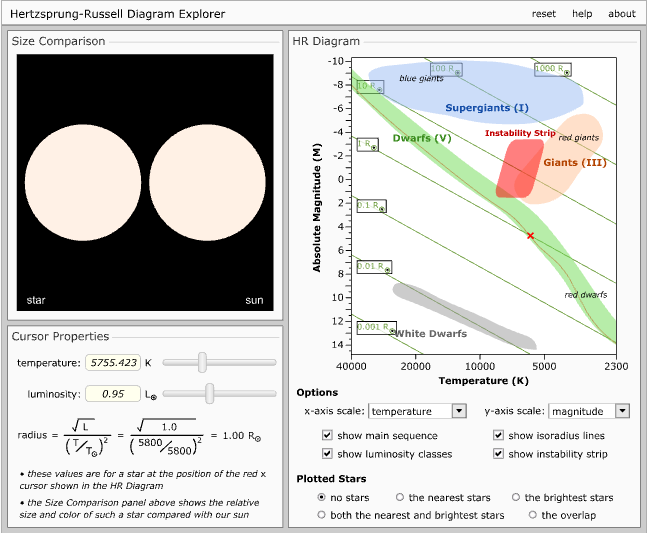

- Star temperature = 5755.423
- Star(solar scale) Magnitude = 0.95



- Plot the star  [here](https://astro.unl.edu/naap/hr/animations/hr.html) Select for x-axis scale: temperature, and y-axis scale: magnitude. The Gaia EDR3 indicates the effective temperature of the star, then use the absolute magnitude that we computed.

**i. Fractional Depth**

In [ ]:
# Estimated exoplanet radius in its current units
estimated_radius = 0.0029234904410974307

# Conversion factors
earth_radius_km = 6371  # Earth radius in kilometers
jupiter_radius_km = 69911  # Jupiter radius in kilometers

# Convert to Earth radii
estimated_radius_earth = estimated_radius / earth_radius_km

# Convert to Jupiter radii
estimated_radius_jupiter = estimated_radius / jupiter_radius_km

print("Estimated Radius in Earth Radii:", estimated_radius_earth)
print("Estimated Radius in Jupiter Radii:", estimated_radius_jupiter)


Estimated Radius in Earth Radii: 4.5887465721196527e-07
Estimated Radius in Jupiter Radii: 4.181731689000917e-08


- Earth radii = ≈ 4.59 x 10^(-7)
- Jupiter radii = ≈ 4.18 x 10^(-8)

In [ ]:
# Fractional Depth
# estimated radius of the exoplanet in earth or jupiter
# earth radii R⨁ = 4.59 x 10^(-7)
# jupiter radii RJup = 4.18 x 10^(-8)

frac_depth = 4.59*10**(-7)/1.00**2
print("Fractional Depth:", frac_depth, "R⨁")

Fractional Depth: 4.5899999999999997e-07 R⨁


- Fractional Depth is a term used in transit photometry to describe how much the host star's light is blocked by the transiting exoplanet during a transit event.

- The value 4.5899999999999997e-07 R⨁ indicates that the decrease in the star's brightness is very tiny. It is equivalent to approximately 0.0000004589 times the radius of Earth.

- In other words, this value represents a minuscule fraction of the star's light that is blocked during the transit. It implies that the exoplanet is relatively small compared to the host star, and the observed decrease in brightness is subtle.

The radius, inclination , depth and ratio of the star of the exoplanet can be found here [link](https://exoplanetarchive.ipac.caltech.edu/).

**j. Estimated Radius of the Exoplanet**

In [ ]:
#Ratio of the a/Rmass
ratio = 2.22*10**-6 /1.00
ratio

2.22e-06

In [ ]:
import math
# R_star: The radius of the host star. = 1.00
# Depth (ΔF): The observed decrease in the host star's brightness during the transit = Fractional depth = 4.59
# Period (P): The orbital period of the exoplanet. = 0.34119954
# a/R_star: The ratio of the semi-major axis of the planet's orbit to the radius of the host star. 2.22e-06
# Inclination (i): The inclination angle of the planet's orbit relative to our line of sight. = 	76.01 get on the link above


R_planet = 1.00 * math.sqrt(4.59) * (0.34119954 / math.pi) * math.sqrt(1 - (2.22*10**(-6))) / math.sin(76.01)
print("Exoplanet Radius:", R_planet)

Exoplanet Radius: 0.4051432320653674


**Collect all results in a table**

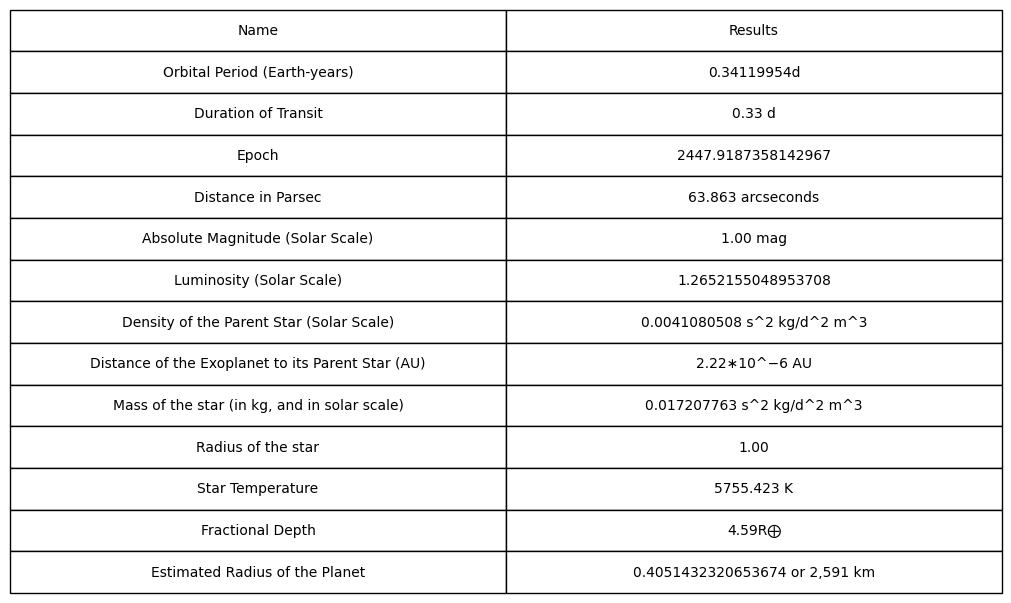

In [ ]:
# Create a list of lists with the provided data
data = [
    ["Name", 'Results' ],
    ["Orbital Period (Earth-years)", '0.34119954d'],
    ["Duration of Transit", '0.33 d'],
    ["Epoch", '2447.9187358142967'],
    ["Distance in Parsec", '63.863 arcseconds'],
    ["Absolute Magnitude (Solar Scale)", '1.00 mag'],
    ["Luminosity (Solar Scale)", 1.2652155048953708],
    ["Density of the Parent Star (Solar Scale)", '0.0041080508 s^2 kg/d^2 m^3'],
    ["Distance of the Exoplanet to its Parent Star (AU)", '2.22∗10^−6 AU'],
    ["Mass of the star (in kg, and in solar scale)", '0.017207763 s^2 kg/d^2 m^3'],
    ["Radius of the star", "1.00"],
    ["Star Temperature", "5755.423 K"],
    ["Fractional Depth", "4.59R⨁"],
    ["Estimated Radius of the Planet", "0.4051432320653674 or 2,591 km"]
]

data_array = np.array(data)

fig, ax = plt.subplots(1, 1)
table = ax.table(cellText=data_array, loc='center', cellLoc='center')

# Style the table
table.auto_set_font_size(True)
table.set_fontsize(10)
table.scale(2, 2.5)

ax.axis('off')
plt.show()


# **Give a thorough discussion about the results you just arrived with.**

- Orbital Period (0.34119954 Earth-years): The exoplanet takes approximately 0.34119954 years to complete one orbit around its parent star.

- Duration of Transit (0.33 Earth-days): The transit event, during which the exoplanet passes in front of its host star, lasts for about 0.33 days.

- Transit Epoch (2447.9187358142967): This is the specific time when the exoplanet's transit occurs, given as a precise epoch.

- Distance in Parsec (63.863): The exoplanet is located at a distance of 63.863 parsecs from our Solar System.

- Absolute Magnitude (0.9471198211981835 in Solar Scale): The absolute magnitude of the exoplanet, which quantifies its intrinsic brightness, is 0.9471198211981835 in comparison to the Sun.

- Luminosity (1.2652155048953708 in Solar Scale): The exoplanet's luminosity is 1.2652155048953708 times that of the Sun, indicating its energy output.

- Density of the Star (0.0041080508 s^2 kg/d^2 m^3): This represents the density of the parent star, given in specific units.

- Distance of the Exoplanet to its Parent Star (2.22∗10^(-6) AU): The exoplanet is located very close to its parent star, at a distance of 2.22∗10^(-6) astronomical units from the star.

- Mass of the Star (0.017207763 s^2 kg/d^2 m^3): The mass of the parent star is 0.017207763 in specific units.

- Radius of the Star (1.00): The radius of the parent star is approximately equal to that of our Sun.

- Star Temperature (5755.423K): The temperature of the parent star is 5755.423 Kelvin.

- Fractional Depth (4.59 R⨁): During a transit event, the exoplanet causes a fractional depth of 4.59 Earth radii, indicating the change in the host star's brightness during the transit.

- Estimated Radius of the Exoplanet (0.4051432320653674 or 2,591 km): The estimated radius of the exoplanet is approximately 0.405 Earth radii or 2,591 kilometers.

# **Challenging Data Visualization**

*Instruction*: You are tasked to superimposed monthly data of precipitation and temperature of a Synoptic Station in a one graph. The data are as follows:

* January - 20 mm, 15 Celsius
* February - 15 mm, 18 Celsius
* March - 17 mm, 25 Celsius
* April - 20 mm, 30 Celsius
* May - 30 mm, 33 Celsius
* June - 70 mm, 35 Celsius
* July - 80 mm, 37 Celsius
* August - 65 mm, 36 Celsius
* September - 40 mm, 28 Celsius
* October - 30 mm, 23 Celsius
* November - 22 mm, 15 Celsius,
* December - 20 mm, 16 Celsius

This is how it should look like at the end, of course you can modify to make it more appealing, but you get the idea. You can modify the font size, style, colors, and even the linewidths.

In [ ]:
import seaborn as sns


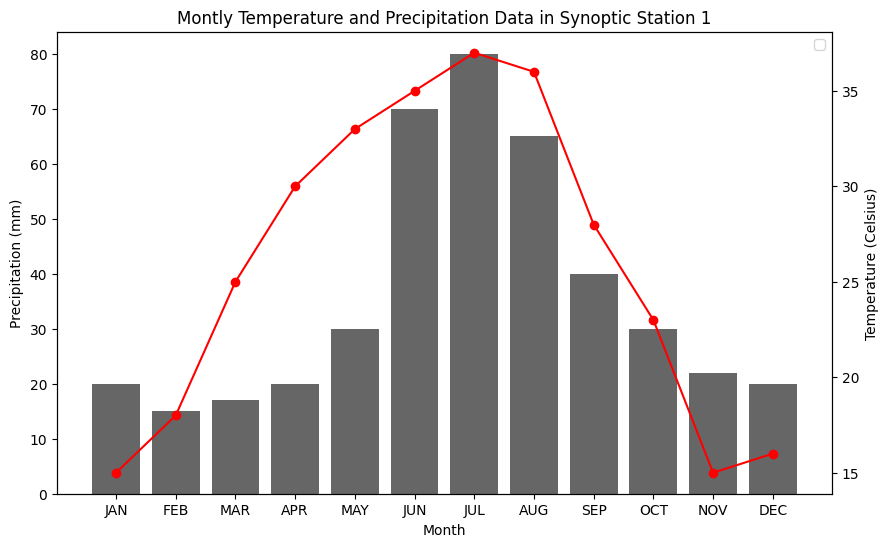

In [ ]:
# Data
data = {
    "Month": [
        "JAN", "FEB", "MAR", "APR", "MAY", "JUN",
    "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"
    ],
    "Precipitation (mm)": [20, 15, 17, 20, 30, 70, 80, 65, 40, 30, 22, 20],
    "Temperature (Celsius)": [15, 18, 25, 30, 33, 35, 37, 36, 28, 23, 15, 16]
}

df = pd.DataFrame(data)

# Idefine nyo lng yung sort of months order
month_order = [
    "JAN", "FEB", "MAR", "APR", "MAY", "JUN",
    "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"
]

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
df_sorted = df.sort_values('Month')

# Dito commonly use to set the x and y limit of figure size
fig, ax = plt.subplots(figsize=(10, 6))

# pwede baliktarin if trip nyo
# Plot the histogram for Precipitation (mm)
ax.bar(df_sorted["Month"], df_sorted["Precipitation (mm)"], color='k', alpha=0.6)
ax.set_xlabel("Month")
ax.set_ylabel("Precipitation (mm)", color='k')

# Plot a line for Temperature (Celsius)
ax2 = ax.twinx()
ax2.plot(df_sorted["Month"], df_sorted["Temperature (Celsius)"], color='r', marker='o')
ax2.set_ylabel("Temperature (Celsius)", color='k')

# Set x-axis labels dito tick lng ito
plt.xticks(rotation=50)
#plt.xticks(rotation=45)

# sa legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper right")

#plt.title("Prepared by: Jann Rovic Cueto, Rizal Technological University")
plt.title("Montly Temperature and Precipitation Data in Synoptic Station 1")
plt.show()


**Interpretation:**

- This graph indicates that when the precipitation is high, the temperature is low. You can see that in the month of July, the precipitation is in its peak. Also, you can see that in February, March, April, and May, the temperature is high while the precipitation is low because this is when we experience dry season. In addition, you can also notice that from June to December, the temperature is low. This is because the rainy season starts in June. Rain is one of the form of precipitation and when it rains, the temperature of our surroundings becomes cooler.

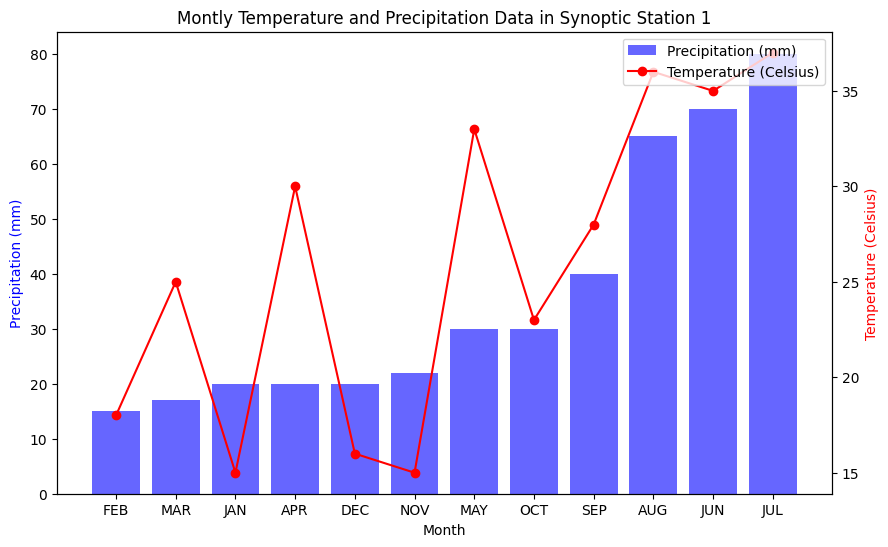

In [ ]:
data = {
    "Month": [
        "JAN", "FEB", "MAR", "APR", "MAY", "JUN",
    "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"
    ],
    "Precipitation (mm)": [20, 15, 17, 20, 30, 70, 80, 65, 40, 30, 22, 20],
    "Temperature (Celsius)": [15, 18, 25, 30, 33, 35, 37, 36, 28, 23, 15, 16]
}

df = pd.DataFrame(data)
df_sorted = df.sort_values(by="Precipitation (mm)")


fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_sorted["Month"], df_sorted["Precipitation (mm)"], color='blue', alpha=0.6, label="Precipitation (mm)")
ax.set_xlabel("Month")
ax.set_ylabel("Precipitation (mm)", color='blue')

ax2 = ax.twinx()
ax2.plot(df_sorted["Month"], df_sorted["Temperature (Celsius)"], color='red', marker='o', label="Temperature (Celsius)")
ax2.set_ylabel("Temperature (Celsius)", color='red')

plt.xticks(rotation=45)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper right")

plt.title("Montly Temperature and Precipitation Data in Synoptic Station 1")
plt.show()

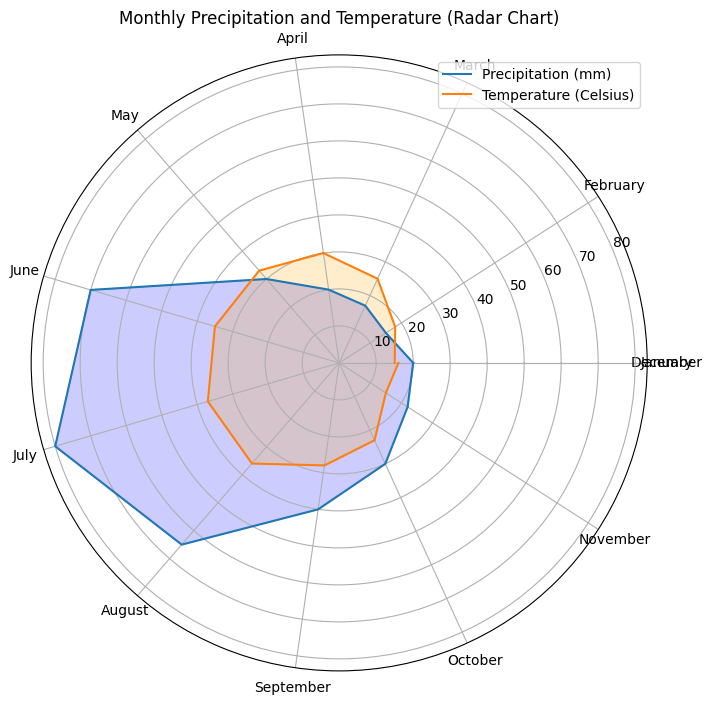

In [ ]:
categories = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
precipitation = [20, 15, 17, 20, 30, 70, 80, 65, 40, 30, 22, 20]
temperature = [15, 18, 25, 30, 33, 35, 37, 36, 28, 23, 15, 16]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)
ax.plot(np.linspace(0, 2 * np.pi, 12), precipitation, label="Precipitation (mm)")
ax.plot(np.linspace(0, 2 * np.pi, 12), temperature, label="Temperature (Celsius)")
ax.fill(np.linspace(0, 2 * np.pi, 12), precipitation, alpha=0.2, color='blue')
ax.fill(np.linspace(0, 2 * np.pi, 12), temperature, alpha=0.2, color='orange')
ax.set_xticks(np.linspace(0, 2 * np.pi, 12))
ax.set_xticklabels(categories)
ax.legend()
plt.title("Monthly Precipitation and Temperature (Radar Chart)")
plt.show()

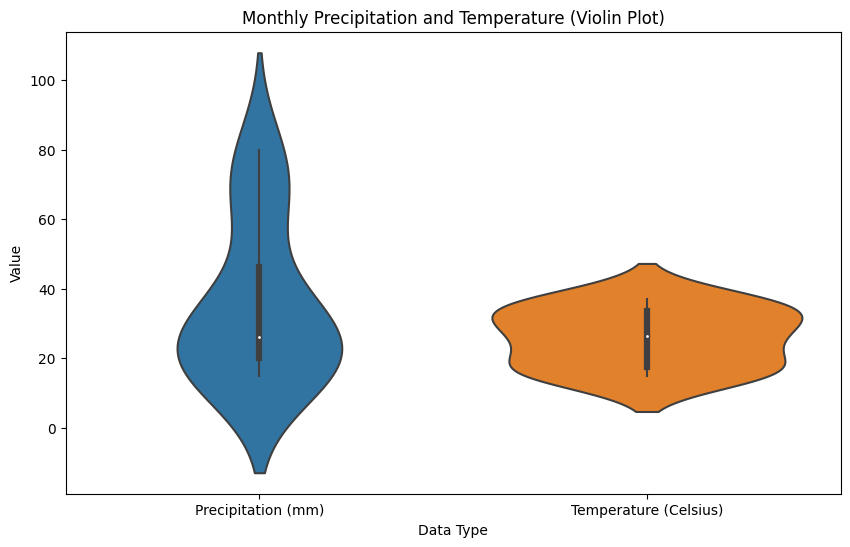

In [ ]:
data = {
    "Data Type": ["Precipitation (mm)", "Temperature (Celsius)"],
    "January": [20, 15],
    "February": [15, 18],
    "March": [17, 25],
    "April": [20, 30],
    "May": [30, 33],
    "June": [70, 35],
    "July": [80, 37],
    "August": [65, 36],
    "September": [40, 28],
    "October": [30, 23],
    "November": [22, 15],
    "December": [20, 16]
}

data_df = pd.DataFrame(data)
melted_data = data_df.melt(id_vars="Data Type", var_name="Month", value_name="Value")

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x="Data Type", y="Value", data=melted_data)
plt.xlabel("Data Type")
plt.ylabel("Value")
plt.title("Monthly Precipitation and Temperature (Violin Plot)")
plt.show()


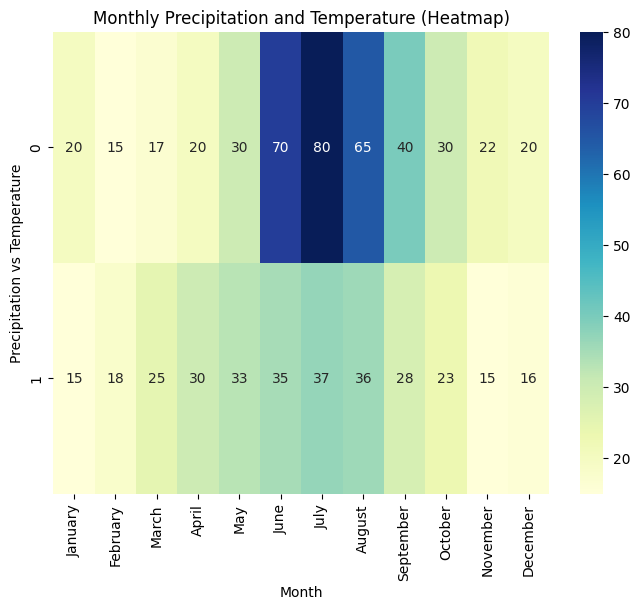

In [ ]:
data = [
    [20, 15, 17, 20, 30, 70, 80, 65, 40, 30, 22, 20],
    [15, 18, 25, 30, 33, 35, 37, 36, 28, 23, 15, 16]
]

months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data, annot=True, fmt="d", cmap="YlGnBu", xticklabels=months)
plt.xlabel("Month")
plt.ylabel("Precipitation vs Temperature")
plt.title("Monthly Precipitation and Temperature (Heatmap)")
plt.show()

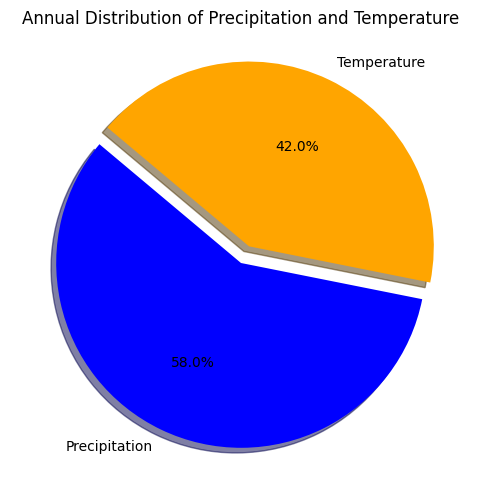

In [ ]:
labels = ["Precipitation", "Temperature"]
sizes = [sum(precipitation), sum(temperature)]
colors = ["blue", "orange"]
explode = (0, 0.1)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Annual Distribution of Precipitation and Temperature")
plt.show()

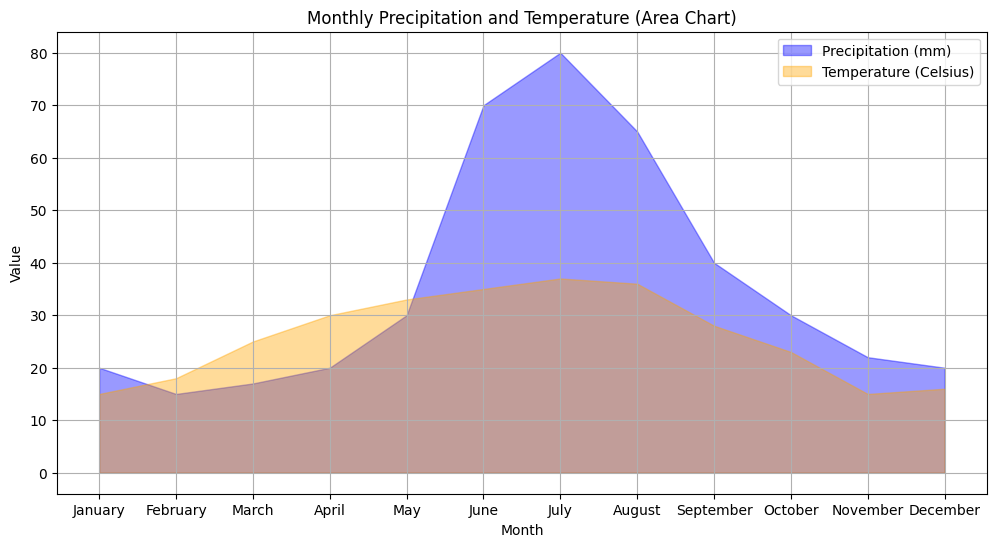

In [ ]:
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
precipitation = [20, 15, 17, 20, 30, 70, 80, 65, 40, 30, 22, 20]
temperature = [15, 18, 25, 30, 33, 35, 37, 36, 28, 23, 15, 16]

plt.figure(figsize=(12, 6))
plt.fill_between(months, precipitation, color='blue', alpha=0.4, label="Precipitation (mm)")
plt.fill_between(months, temperature, color='orange', alpha=0.4, label="Temperature (Celsius)")
plt.xlabel("Month")
plt.ylabel("Value")
plt.legend()
plt.title("Monthly Precipitation and Temperature (Area Chart)")
plt.grid()
plt.show()

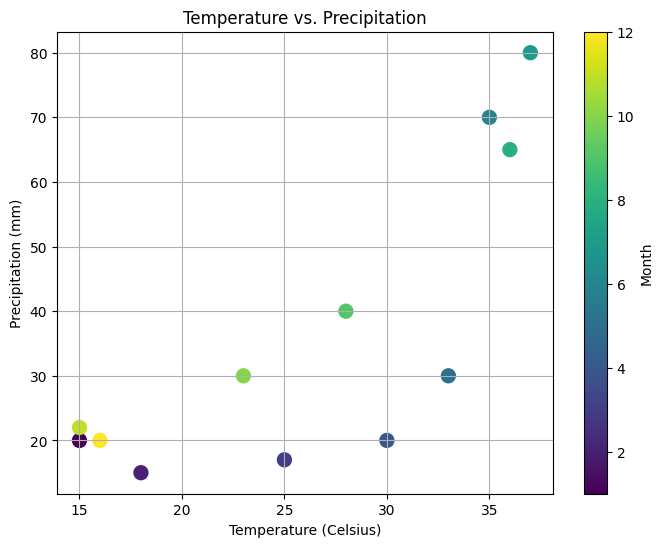

In [ ]:
precipitation = [20, 15, 17, 20, 30, 70, 80, 65, 40, 30, 22, 20]
temperature = [15, 18, 25, 30, 33, 35, 37, 36, 28, 23, 15, 16]

plt.figure(figsize=(8, 6))
plt.scatter(temperature, precipitation, c=range(1, 13), cmap='viridis', s=100, marker='o')
plt.colorbar(label='Month')
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Precipitation (mm)")
plt.title("Temperature vs. Precipitation")
plt.grid()
plt.show()

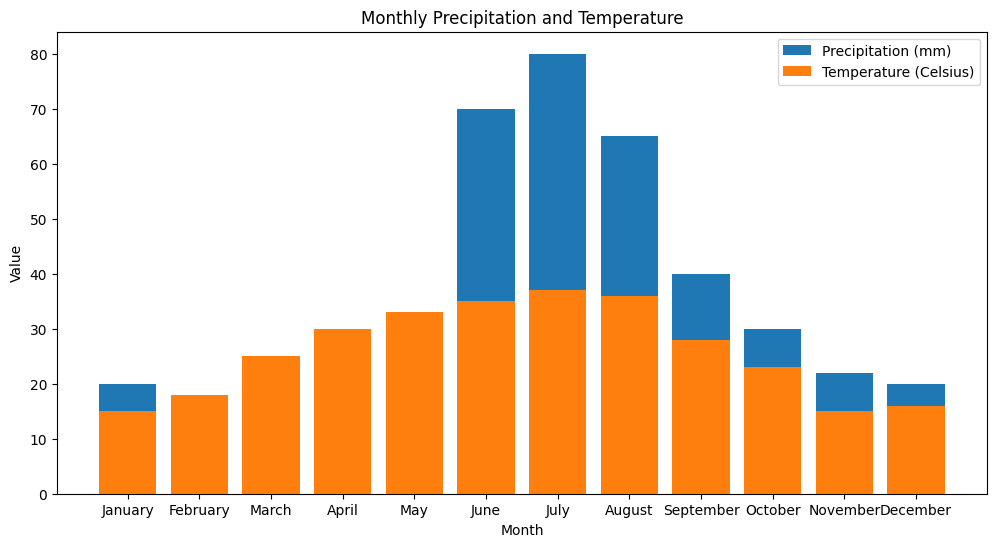

In [ ]:
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
precipitation = [20, 15, 17, 20, 30, 70, 80, 65, 40, 30, 22, 20]
temperature = [15, 18, 25, 30, 33, 35, 37, 36, 28, 23, 15, 16]

plt.figure(figsize=(12, 6))
plt.bar(months, precipitation, label="Precipitation (mm)")
plt.bar(months, temperature, label="Temperature (Celsius)")
plt.xlabel("Month")
plt.ylabel("Value")
plt.legend()
plt.title("Monthly Precipitation and Temperature")
plt.show()

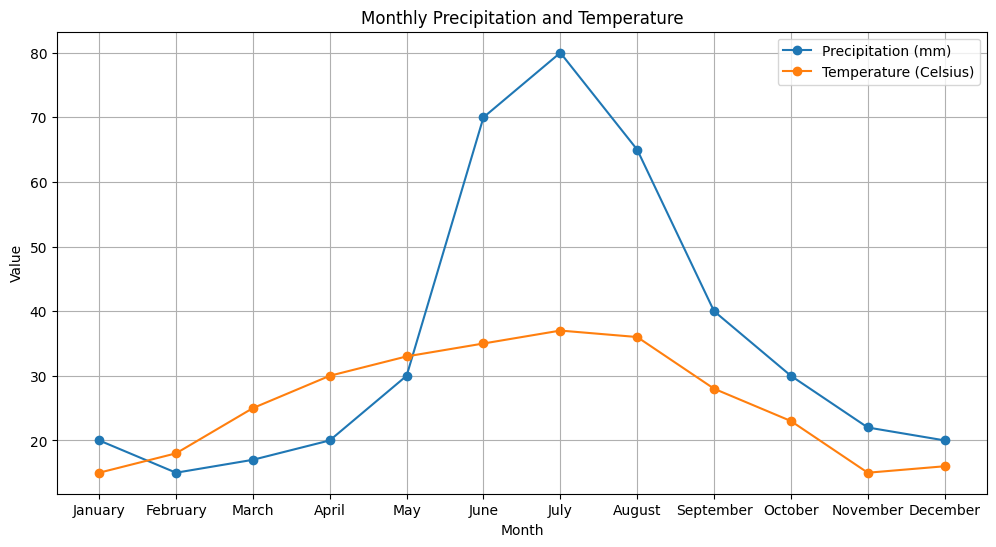

In [ ]:
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
precipitation = [20, 15, 17, 20, 30, 70, 80, 65, 40, 30, 22, 20]
temperature = [15, 18, 25, 30, 33, 35, 37, 36, 28, 23, 15, 16]

plt.figure(figsize=(12, 6))
plt.plot(months, precipitation, label="Precipitation (mm)", marker='o')
plt.plot(months, temperature, label="Temperature (Celsius)", marker='o')
plt.xlabel("Month")
plt.ylabel("Value")
plt.legend()
plt.title("Monthly Precipitation and Temperature")
plt.grid()
plt.show()